In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torchaudio
from scipy import signal
import torch
from torch.utils.data import DataLoader

from ipywidgets import interactive
from IPython.display import Audio, display

## TorchAudio SPEECHCOMMANDS Dataset

In [2]:
ds = torchaudio.datasets.SPEECHCOMMANDS("data", download=True)

In [3]:
len(ds)

105829

In [4]:
waveform, sample_rate, utterance, speaker_id, utterance_id = ds[10]
waveform, sample_rate, utterance, speaker_id, utterance_id

(tensor([[-3.0518e-05,  9.1553e-05,  1.8311e-04,  ..., -1.5259e-04,
          -1.2207e-04, -1.2207e-04]]),
 16000,
 'eight',
 '0cb74144',
 2)

In [5]:
waveform.shape


torch.Size([1, 16000])

In [6]:
display(Audio(data=waveform, rate=sample_rate))

(129,) (71,) (129, 71)


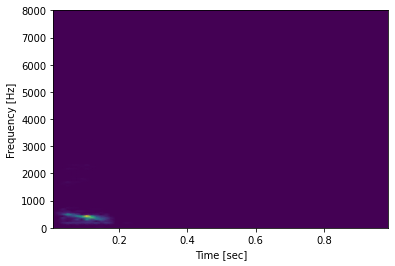

In [39]:
f, t, Sxx =signal.spectrogram(waveform.view(-1), fs=sample_rate)
print(f.shape, t.shape, Sxx.shape)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

torch.Size([1, 201, 81])


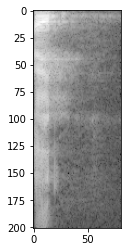

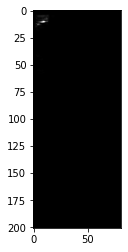

In [48]:
specgram = torchaudio.transforms.Spectrogram()(waveform)
plt.figure()
print(specgram.shape)
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap="gray")
plt.show()
plt.imshow(specgram[0,:,:].numpy(), cmap="gray")

## CinC2020 Dataset

In [8]:
from datasets import CinC2020

In [240]:
ds = CinC2020(set_seq_len=5000, fs=500, clean_signal=True)
p_signal, sampling_rate, age, sex, dx = ds[0]
p_signal, sampling_rate, age, sex, dx

(array([[ 0.00023028,  0.0015427 ,  0.00132405, ...,  0.01512091,
         -0.00923978, -0.00637499],
        [ 0.000211  ,  0.00056434,  0.00040496, ...,  0.02023743,
         -0.00940781, -0.0072829 ],
        [ 0.00019173, -0.00042402, -0.00053412, ...,  0.02484411,
         -0.00953574, -0.00814077],
        ...,
        [-0.01050244, -0.01771826, -0.00795653, ..., -0.0322378 ,
         -0.0084096 ,  0.00053057],
        [-0.00995213, -0.01562813, -0.00627436, ..., -0.02894913,
         -0.00722838,  0.00120927],
        [-0.00947202, -0.01347868, -0.00444271, ..., -0.02532123,
         -0.00600689,  0.00196797]], dtype=float32),
 500,
 53.0,
 0.0,
 164867002)

In [241]:
# display(Audio(data=p_signal[:,0], rate=sampling_rate))
iter_ds = iter(ds)

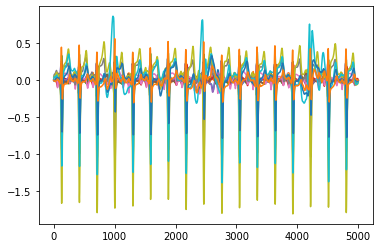

In [242]:
p_signal, sampling_rate, age, sex, dx = next(iter_ds)
# while np.max(p_signal) < 10:
#     p_signal, sampling_rate, age, sex, dx = next(iter_ds)

plt.plot(p_signal)
plt.show()

In [243]:
# def _rescale_signal(sig, clamp_range=(0, 1)):
#     return np.interp(sig, (sig.min(), sig.max()), clamp_range)

# _, num_leads = p_signal.shape
# p_signal_scaled = np.stack(
#     list(
#         map(
#             _rescale_signal, 
#             [p_signal[:, lead_idx] for lead_idx in range(num_leads)]
#         )
#     ),
#     axis=1
# )

# plt.plot(p_signal_scaled)
# plt.show()

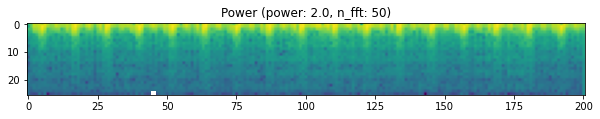

/home/alexander/sandbox/src/git.udia.ca/alex/msc_experiments/env/lib/python3.7/site-packages/torchaudio/functional.py:110: UserWarning: istft has been moved to PyTorch and will be removed from torchaudio, please use torch.istft instead.
  'istft has been moved to PyTorch and will be removed from torchaudio, '


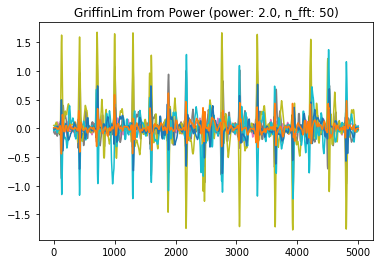

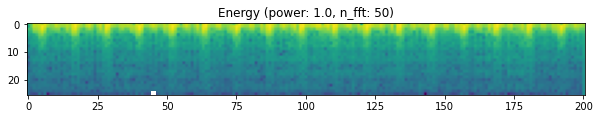

/home/alexander/sandbox/src/git.udia.ca/alex/msc_experiments/env/lib/python3.7/site-packages/torchaudio/functional.py:110: UserWarning: istft has been moved to PyTorch and will be removed from torchaudio, please use torch.istft instead.
  'istft has been moved to PyTorch and will be removed from torchaudio, '


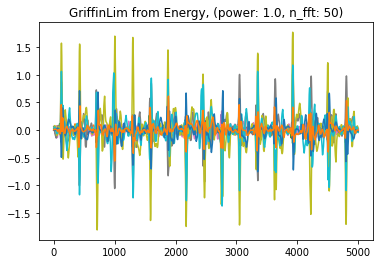

In [244]:
n_fft = 50

# power
power = 2.0
n = torchaudio.transforms.Spectrogram(n_fft = n_fft, power = power)

specgram = n(torch.Tensor(p_signal.T))
plt.figure(figsize=(10, 100))

plt.title(f"Power (power: {power}, n_fft: {n_fft})")
plt.imshow(specgram[0,:,:].log2().numpy())
plt.show()

rn = torchaudio.transforms.GriffinLim(n_fft = n_fft, power = power)
recon = rn(specgram)
plt.figure()

plt.title(f"GriffinLim from Power (power: {power}, n_fft: {n_fft})")
plt.plot(recon.T)
plt.show()

# energy
power = 1.0
n = torchaudio.transforms.Spectrogram(n_fft = n_fft, power=power)

specgram = n(torch.Tensor(p_signal.T))
plt.figure(figsize=(10, 100))

plt.title(f"Energy (power: {power}, n_fft: {n_fft})")
plt.imshow(specgram[0,:,:].log2().numpy())
plt.show()

rn = torchaudio.transforms.GriffinLim(n_fft = n_fft, power=power)
recon = rn(specgram)
plt.figure()

plt.title(f"GriffinLim from Energy, (power: {power}, n_fft: {n_fft})")
plt.plot(recon.T)
plt.show()

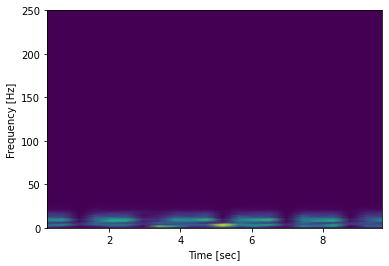

In [247]:
f, t, Sxx =signal.spectrogram(p_signal[:, 0], fs=sampling_rate)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [248]:
p_signal, sampling_rate, age, sex, dx = next(iter(DataLoader(ds, batch_size=3)))

p_signal.shape, sampling_rate, age, sex, dx

(torch.Size([3, 5000, 12]),
 tensor([500, 500, 500]),
 tensor([53., 70., 70.], dtype=torch.float64),
 tensor([0., 1., 1.], dtype=torch.float64),
 tensor([164867002, 164861001, 164861001]))

In [355]:
x = torch.transpose(p_signal, 1, 2)
n_fft = 50
power = 2.0
seq_len = 4000
embed_dim = 128

enc = nn.Sequential(
    # torch.Size([b, 12, 26, 201])
    nn.Conv2d(in_channels=12, out_channels=24, kernel_size=(1,2)),
    nn.ReLU(),
    # torch.Size([b, 24, 24, 200])
    nn.MaxPool2d((1,2)),
    # torch.Size([b, 24, 12, 100])
)

print("encoder params", sum(dict((p.data_ptr(), p.numel()) for p in enc.parameters()).values()))

dec = nn.Sequential(
#     nn.ConvTranspose2d(in_channels=24, out_channels=24, kernel_size=1, stride=1),
#     nn.ReLU(),
    # torch.Size([b, 24, 12, 100])
    nn.Upsample(scale_factor=(1, 2)),
    # torch.Size([b, 24, 24, 200])
    nn.ConvTranspose2d(in_channels=24, out_channels=12, kernel_size=(1,2), stride=1),
    nn.ReLU(),
    # torch.Size([b, 12, 26, 201])
)

print("decoder params", sum(dict((p.data_ptr(), p.numel()) for p in dec.parameters()).values()))

# encoding forward
samp_in = torchaudio.transforms.Spectrogram(n_fft=n_fft, power=power, normalized=True)(x)
z = enc(samp_in)

assert dec(z).shape == samp_in.shape, f"{dec(z).shape} != {samp_in.shape}"
print("bottleneck", z.shape)

encoder params 600
decoder params 588
bottleneck torch.Size([3, 24, 26, 100])


torch.Size([3, 12, 26, 201]) tensor(54.2641) tensor(0.)


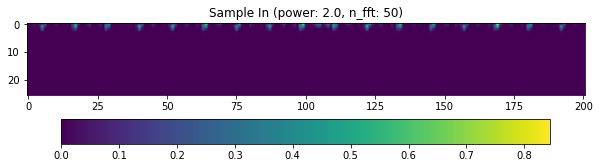

/home/alexander/sandbox/src/git.udia.ca/alex/msc_experiments/env/lib/python3.7/site-packages/torchaudio/functional.py:110: UserWarning: istft has been moved to PyTorch and will be removed from torchaudio, please use torch.istft instead.
  'istft has been moved to PyTorch and will be removed from torchaudio, '


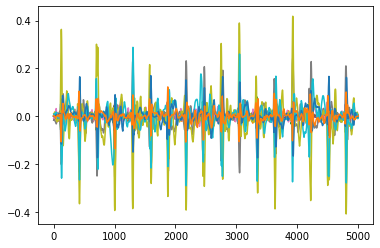

torch.Size([3, 12, 26, 201]) tensor(11.4222, grad_fn=<MaxBackward1>) tensor(0.)


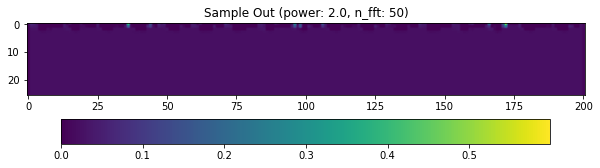

/home/alexander/sandbox/src/git.udia.ca/alex/msc_experiments/env/lib/python3.7/site-packages/torchaudio/functional.py:110: UserWarning: istft has been moved to PyTorch and will be removed from torchaudio, please use torch.istft instead.
  'istft has been moved to PyTorch and will be removed from torchaudio, '


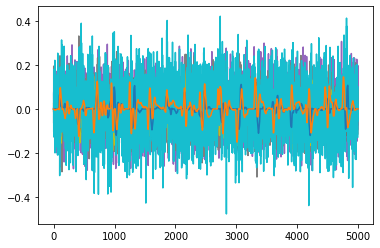

In [356]:
print(samp_in.shape, torch.max(samp_in), torch.min(samp_in))
plt.figure(figsize=(10, 3))

plt.title(f"Sample In (power: {power}, n_fft: {n_fft})")
plt.imshow(samp_in[0, 0, :,:].numpy())
plt.colorbar(orientation="horizontal")
plt.show()

recon = torchaudio.transforms.GriffinLim(n_fft=n_fft, power=power, normalized=True)(samp_in)
plt.figure()
plt.plot(recon[0, :, :].T)
plt.show()

samp_out = dec(enc(samp_in))
print(samp_out.shape, torch.max(samp_out), torch.min(samp_in))
plt.figure(figsize=(10, 3))

plt.title(f"Sample Out (power: {power}, n_fft: {n_fft})")
plt.imshow(samp_out[0, 0, :, :].detach().numpy())
plt.colorbar(orientation="horizontal")
plt.show()

recon = torchaudio.transforms.GriffinLim(n_fft=n_fft, power=power, normalized=True)(samp_out.detach())
plt.figure()
plt.plot(recon[0, :, :].T)
plt.show()


## MNIST

In [ ]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

In [ ]:
mnist = MNIST("data", train=True, download=True, transform=ToTensor())
len(mnist)

In [ ]:
img_tensor, label = mnist[0]
img_tensor.shape, label

In [ ]:
next(iter(DataLoader(mnist,  batch_size=16)))